#      DATA  ANALYSIS  PROJECT
#
#
#

In [489]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
links = pd.read_csv("D:\Dataset\movies\links.csv")
ratings = pd.read_csv("D:/Dataset/movies/ratings.csv")
movies = pd.read_csv("D:\Dataset\movies\movies.csv")
tags = pd.read_csv("D:/Dataset/movies/tags.csv")

In [4]:
# understanding the datasets 
{
    'tags':tags.columns,
    'ratings':ratings.columns,
    'movies':movies.columns,
    'links':links.columns
}

{'tags': Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object'),
 'ratings': Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object'),
 'movies': Index(['movieId', 'title', 'genres'], dtype='object'),
 'links': Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')}

In [128]:
{
    'tags':tags.head(1),
    'movies':movies.head(1),
    'ratings':ratings.head(1),
    'links':links.head(1)
}

{'tags':    userId  movieId    tag   timestamp
 0       2    60756  funny  1445714994,
 'movies':    movieId             title                                       genres
 0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy,
 'ratings':    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703,
 'links':    movieId  imdbId  tmdbId
 0        1  114709   862.0}

#
#
# Data cleaning
#
#

###
### Finding and handling missing values
###

In [29]:
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [30]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [31]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [57]:
links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [56]:
cleaned_links = links.dropna()
cleaned_links.isna().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

###
### Remove duplicate rows.
###

In [66]:
cleaned_links.duplicated().sum()

0

In [62]:
movies.duplicated().sum()

0

In [64]:
ratings.duplicated().sum()

0

In [68]:
tags.duplicated().sum()

0

### 
### Standardize the format of the timestamp column in ratings.csv and tags.csv.
###


In [75]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [87]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [351]:
tags['timestamp']=pd.to_datetime(tags['timestamp'] , unit = 's')

In [245]:
ratings['timestamp']=pd.to_datetime(ratings['timestamp'] , unit = 's')

In [12]:
{
    'tags':tags.dtypes,
    'ratings':ratings.dtypes
}

{'tags': userId        int64
 movieId       int64
 tag          object
 timestamp     int64
 dtype: object,
 'ratings': userId              int64
 movieId             int64
 rating            float64
 timestamp           int64
 rating_clipped    float64
 dtype: object}

###
### Convert the genres column in movies.csv into a list of genres.
###


In [17]:
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies.sample(5)

,movieId,title,genres
381,437,Cops and Robbersons (1994),[Comedy]
4758,7084,"Play It Again, Sam (1972)","[Comedy, Romance]"
6619,55946,Lions For Lambs (2007),"[Drama, Thriller, War]"
5389,8982,I Am David (2003),[Drama]
2372,3147,"Green Mile, The (1999)","[Crime, Drama]"


###
### Create a consistent format for multi-word tags.
###

In [109]:
tags['tag'] = tags['tag'].apply(lambda x: x.replace(' ','_'))
tags.sample(5)

,userId,movieId,tag,timestamp,tags
1368,474,1247,Simon_and_Garfunkel,2006-01-13 19:38:04,Simon_and_Garfunkel
1309,474,1178,military,2006-01-17 18:06:09,military
1473,474,1643,Queen_Victoria,2006-01-16 01:44:09,Queen_Victoria
3514,599,296,Quotable,2017-06-26 05:54:06,Quotable
3420,599,296,cult_classic,2017-06-26 05:55:22,cult_classic


In [113]:
tags['tag'] = tags['tag'].apply(lambda x: x.replace('-','_'))
tags.sample(5)

,userId,movieId,tag,timestamp
527,184,193565,anime,2018-09-16 11:49:42
2952,567,2731,heartwarming,2018-05-02 18:29:30
834,424,3176,obsession,2016-03-13 04:57:16
3120,567,50872,inspirational,2018-05-02 17:58:08
1798,474,3456,In_Netflix_queue,2006-01-14 01:17:43


##
### Remove movies with no associated ratings or tags
##

In [6]:
# Movies with ratings
Movies_with_ratings = movies[movies['movieId'].isin(ratings['movieId'])]
# Movies with tags 
Movies_with_tags = movies[movies['movieId'].isin(tags['movieId'])]
# movies with tags and ratings
movies_with_tags_and_ratings = Movies_with_tags[Movies_with_tags['movieId'].isin(Movies_with_ratings['movieId'])]

# In this df only those movies are present which have both tags and ratings 
movies_with_tags_and_ratings = pd.DataFrame(movies_with_tags_and_ratings)
movies_with_tags_and_ratings.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


### 
### Validate the userId column in ratings.csv and tags.csv.
### 

In [200]:
# checking that how many userId are tags and ratings DF
userId_with_tags_in_rating = tags['userId'].isin(ratings['userId'])

# printing the how muh users are in ratings DF
if(userId_with_tags_in_rating.count() == tags['userId'].count()):
    print("All userIds present in ratings DF.")
else:
    print(f"Only {userId_with_tags_in_rating.count()} are present in the ratings DF.")

All userIds present in ratings DF.


###
### Detect and handle outliers in the rating column.

###

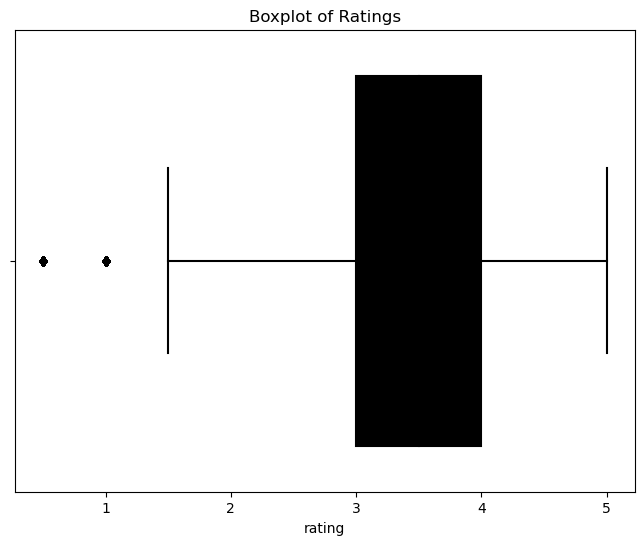

In [199]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=ratings['rating'],color='black')

# Display the plot
plt.title('Boxplot of Ratings')
plt.show()

In [18]:
# Calculate the IQR (Interquartile Range) for ratings
Q1 = ratings['rating'].quantile(0.25)
Q3 = ratings['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers (1.5 * IQR rule)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers using np.clip()
ratings['rating_clipped'] = np.clip(ratings['rating'], 1.5, 5)

# Check the results
ratings.sample(20)

,userId,movieId,rating,timestamp,rating_clipped
32041,219,60072,3.0,1217436484,3.0
31340,217,2518,3.0,955944449,3.0
74713,474,7013,4.5,1070286782,4.5
57642,380,32017,3.0,1494267847,3.0
55468,368,521,3.0,971276675,3.0
12998,83,2324,3.5,1332839949,3.5
66711,429,421,4.0,828124615,4.0
62782,414,1298,4.0,961512557,4.0
103,1,1617,5.0,964982951,5.0
8131,57,720,5.0,965796004,5.0


#
### Ensure all movies in links.csv exist in movies.csv.
#

In [10]:
if(links['movieId'].isin(movies['movieId']).count() == links['movieId'].count()):
    print("All Movies of links.csv are present in movies.csv")
else:
    print(f"Only {links['movieId'].isin(movies['movieId']).count()} are present in the movies.csv")

All Movies of links.csv are present in movies.csv


#
#
# EDA (Exploratory Data Analysis)
#
#

#
### Calculate the distribution of movie ratings.
#

In [28]:
df = pd.DataFrame(ratings['rating_clipped'].value_counts())
df.reset_index()

,rating_clipped,count
0,4.0,26818
1,3.0,20047
2,5.0,13211
3,3.5,13136
4,4.5,8551
5,2.0,7551
6,1.5,5972
7,2.5,5550


#
### Identify the most active users (who provided the most ratings).
#

In [37]:

df = pd.DataFrame(ratings['userId'].value_counts().head(10))
df.reset_index()   # Top 10 users who give ratings more than others 

,userId,count
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
5,610,1302
6,68,1260
7,380,1218
8,606,1115
9,288,1055


#
### Identify the top 10 most-rated movies.
#

In [54]:
df = ratings['movieId'].value_counts().head(10).reset_index()
Top_10_most_rated_movie = movies[movies['movieId'].isin(df['movieId'])]
Top_10_most_rated_movie
df

,movieId,count
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
5,260,251
6,480,238
7,110,237
8,589,224
9,527,220


#
### Analyze the frequency of each tag.
#

In [10]:
tags['tag'].value_counts()

tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
small towns            1
In Your Eyes           1
Lloyd Dobbler          1
weak plot              1
Heroic Bloodshed       1
Name: count, Length: 1589, dtype: int64

#
### Investigate the most common pairs of genres.
#

In [11]:
movies['genres'].value_counts().head(10)   # Top 10 common pairs of generes

genres
Drama                   1053
Comedy                   946
Comedy|Drama             435
Comedy|Romance           363
Drama|Romance            349
Documentary              339
Comedy|Drama|Romance     276
Drama|Thriller           168
Horror                   167
Horror|Thriller          135
Name: count, dtype: int64

#
### Average rating of each genre
#

In [39]:
df = movies.copy()       # making a copy of Movies dataframe

df = df.explode('genres')    # explode function is used to separate the value of a list 

rdf = pd.merge(df,ratings,on='movieId')     # merging the dataframes df(movies.csv) and rating and store into rdf

rdf.groupby('genres')['rating'].mean().reset_index()

,genres,rating
0,(no genres listed),3.489362
1,Action,3.447984
2,Adventure,3.508609
3,Animation,3.629937
4,Children,3.412956
5,Comedy,3.384721
6,Crime,3.658294
7,Documentary,3.797785
8,Drama,3.656184
9,Fantasy,3.491001


#
### Analyse the most common genre
#

In [51]:
df = movies.copy()
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
new_df = df.explode('genres')
Top10 = new_df['genres'].value_counts().head(10)
Top10

genres
Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror        978
Fantasy       779
Name: count, dtype: int64

#
### Extract the release year of all the movies 
#

In [63]:
movies['title'].apply(lambda x: x.split('('))

0                                [Toy Story , 1995)]
1                                  [Jumanji , 1995)]
2                         [Grumpier Old Men , 1995)]
3                        [Waiting to Exhale , 1995)]
4              [Father of the Bride Part II , 1995)]
                            ...                     
9737    [Black Butler: Book of the Atlantic , 2017)]
9738                 [No Game No Life: Zero , 2017)]
9739                                 [Flint , 2017)]
9740          [Bungo Stray Dogs: Dead Apple , 2018)]
9741          [Andrew Dice Clay: Dice Rules , 1991)]
Name: title, Length: 9742, dtype: object

In [214]:
df = movies.copy()
df['title_split'] = df['title'].apply(lambda x: x.split('('))

def extract_title_and_year(title_split):
    if len(title_split) == 2:
        # If there are two elements, return both parts (title and year)
        return pd.Series([title_split[0].strip(), title_split[1].replace(')', '').strip()])
    else:
        # If the split doesn't result in exactly two elements, return None
        return pd.Series([title_split[0].strip(), None])

In [215]:
df[['movie_title', 'release_year']] = df['title_split'].apply(extract_title_and_year)
df

,movieId,title,genres,title_split,movie_title,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy Story , 1995)]",Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Jumanji , 1995)]",Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Grumpier Old Men , 1995)]",Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Waiting to Exhale , 1995)]",Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,"[Father of the Bride Part II , 1995)]",Father of the Bride Part II,1995
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,"[Black Butler: Book of the Atlantic , 2017)]",Black Butler: Book of the Atlantic,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,"[No Game No Life: Zero , 2017)]",No Game No Life: Zero,2017
9739,193585,Flint (2017),Drama,"[Flint , 2017)]",Flint,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,"[Bungo Stray Dogs: Dead Apple , 2018)]",Bungo Stray Dogs: Dead Apple,2018


#
### Analyze the most common genres.
#

In [92]:
# Step 1 : split the genres into list and seprate all of them 
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
df = movies.explode('genres')

In [99]:
# step 2: counts the frequency of genres
df['genres'].value_counts().head(5)   # These are the top 5 most common which alsmost used in 40 - 50% of all movies

genres
Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
Name: count, dtype: int64

In [98]:
len(movies['movieId'].unique())

9742

#
### Identify the most active users (who  provided the most ratings)
#

In [108]:
ratings['userId'].value_counts().sort_values(ascending=False).head(3) # These are the Top 3 Users who gave almost ratings

userId
414    2698
599    2478
474    2108
Name: count, dtype: int64

#
#
# Data Visualization 
#
#

#
### Create a histogram of movie ratings.
#

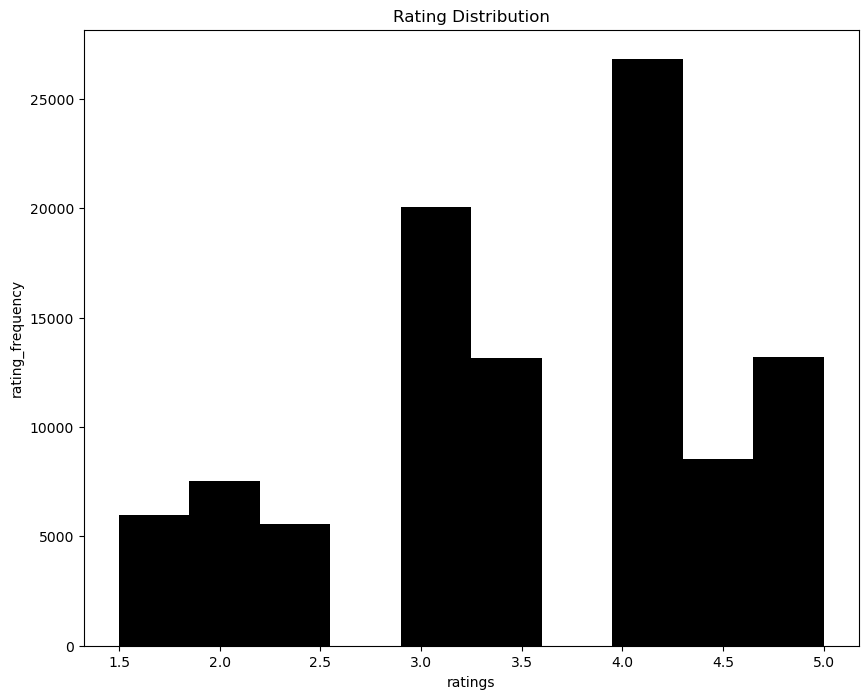

In [182]:
plt.figure(figsize=(10,8))
plt.hist(ratings['rating_clipped'], color="Black")
plt.title('Rating Distribution')
plt.xlabel('ratings')
plt.ylabel('rating_frequency')
plt.show()

#
### Create a bar plot for the top 10 most common genres.
#

In [25]:
df = movies.copy()
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
new_df = df.explode('genres')
Top10 = pd.DataFrame(new_df['genres'].value_counts().head(10).reset_index())
Top10

,genres,count
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
5,Adventure,1263
6,Crime,1199
7,Sci-Fi,980
8,Horror,978
9,Fantasy,779


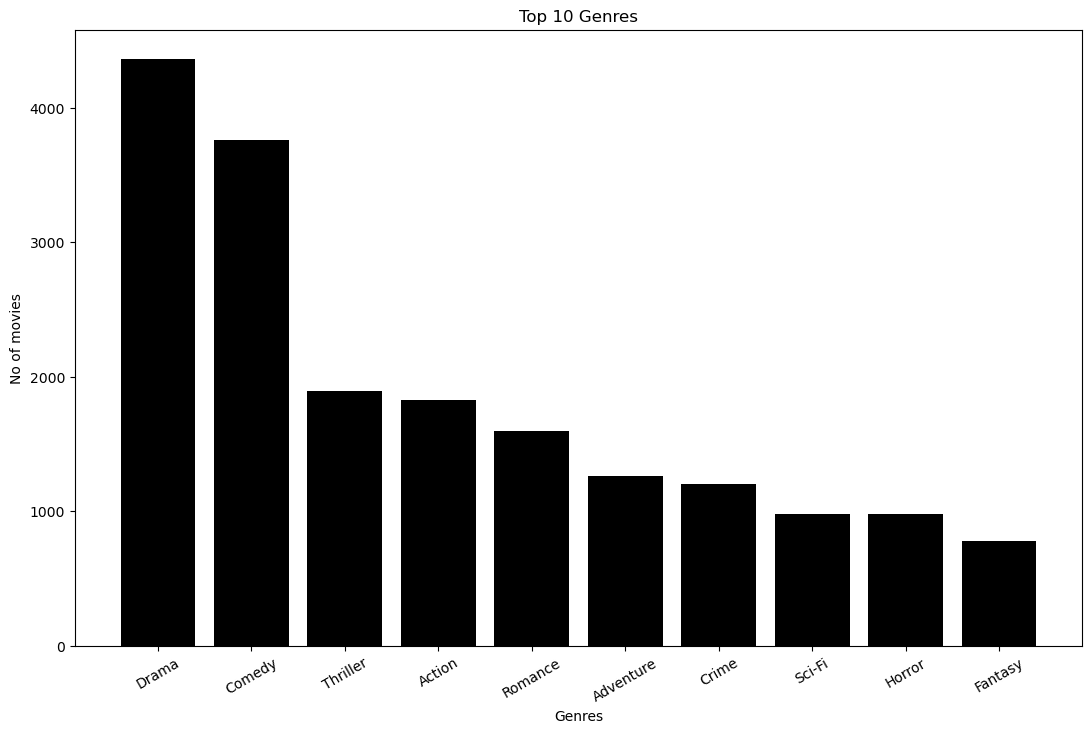

In [60]:
plt.figure(figsize=(13,8))
plt.bar(Top10['genres'],Top10['count'],color='Black')
plt.title('Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('No of movies')
plt.xticks(rotation=30)
plt.show()

#
### Generate a Pie Chart for rating distribution
#

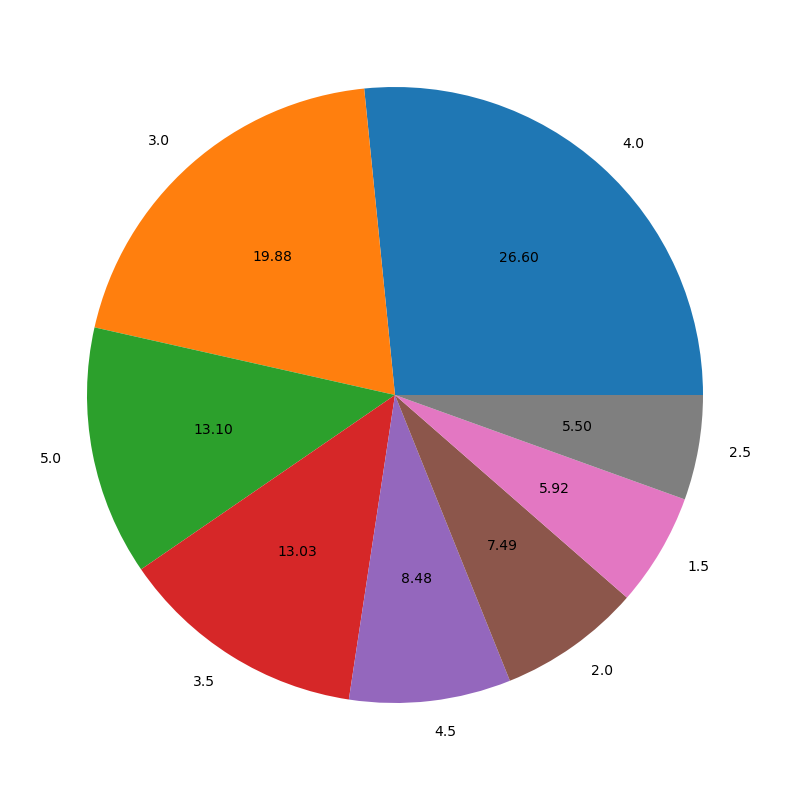

In [55]:
plt.figure(figsize=(13,10))
df = ratings['rating_clipped'].value_counts().reset_index()
plt.pie(df['count'],labels=df['rating_clipped'],autopct='%0.2f')
plt.show()

#
### Create a scatter plot of ratings vs. timestamp.
#

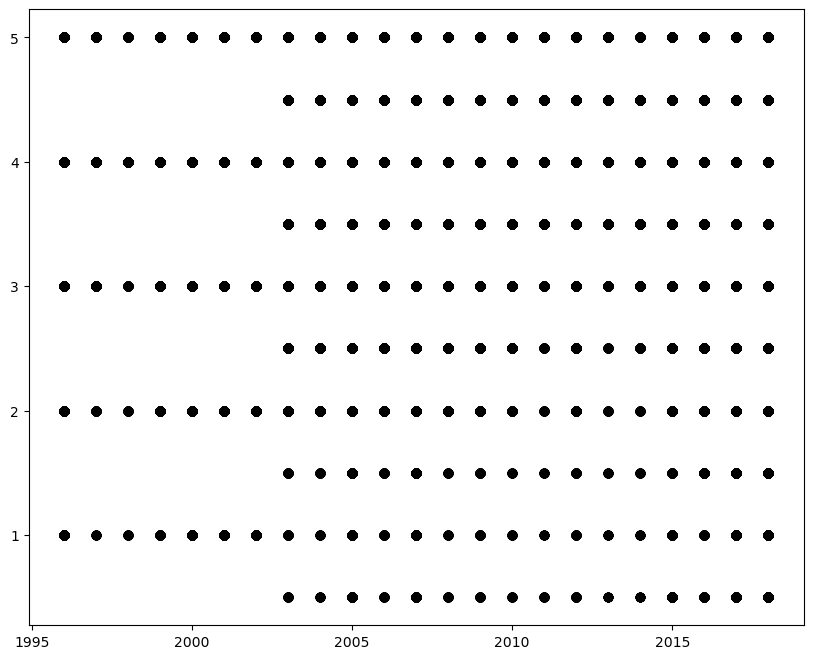

In [78]:
plt.figure(figsize=(10,8))
plt.scatter(ratings['timestamp'].dt.year,ratings['rating'],color='Black')

#
### Generate a bar plot for the most active users.
#

In [97]:
df = ratings['userId'].value_counts().head(10).reset_index()
df['userId'] = df['userId'].astype(str)

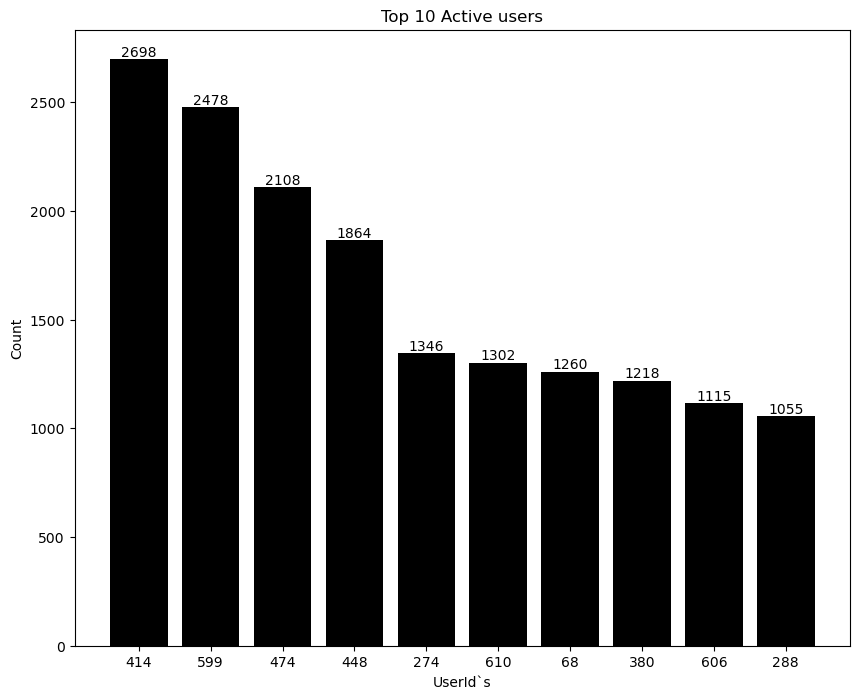

In [110]:
plt.figure(figsize=(10,8))
bars=plt.bar(df['userId'],df['count'],color='Black')
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (the value)
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.title('Top 10 Active users')
plt.xlabel('UserId`s')
plt.ylabel('Count')
plt.show()

#
### Create a heatmap of correlations between rating and timestamp.
#

In [117]:
correlation=ratings[['rating','timestamp']].corr()
correlation

,rating,timestamp
rating,1.000000,-0.005802
timestamp,-0.005802,1.000000


Text(0.5, 1.0, 'Correlation between rating & Timestamp')

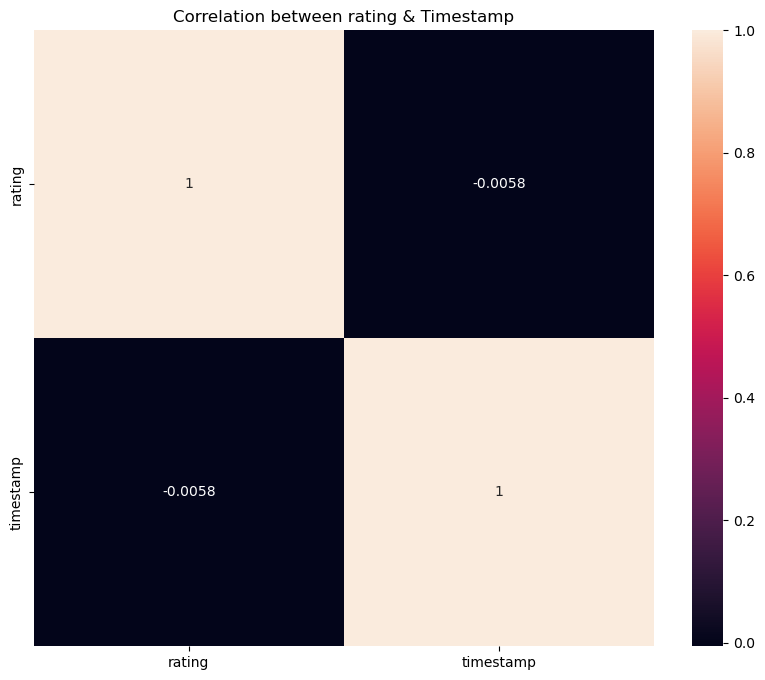

In [124]:
plt.figure(figsize=(10,8))
sns.heatmap(m,annot=True)
plt.title('Correlation between rating & Timestamp')

#
### Visualize the trend of ratings over time.
#

In [181]:
ratings['year']=ratings['timestamp'].dt.year
df=ratings.groupby('year')['rating'].count().reset_index()
df.head()

,year,rating
0,1996,6040
1,1997,1916
2,1998,507
3,1999,2439
4,2000,10061


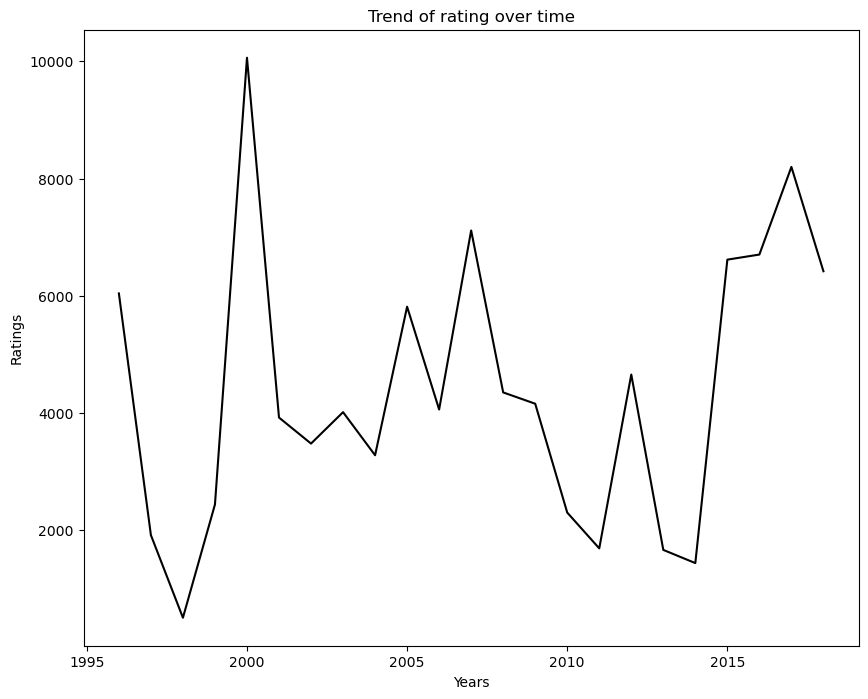

In [147]:
plt.figure(figsize=(10,8))
plt.plot(df['year'],df['rating'],color='Black')
plt.title('Trend of rating over time')
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.show()

#
### Create a bar plot for the top 10 most rated movies.
#

In [175]:
Top10 = ratings['movieId'].value_counts().reset_index().head(10)
Top10['movieId'] = Top10['movieId'].astype(str)

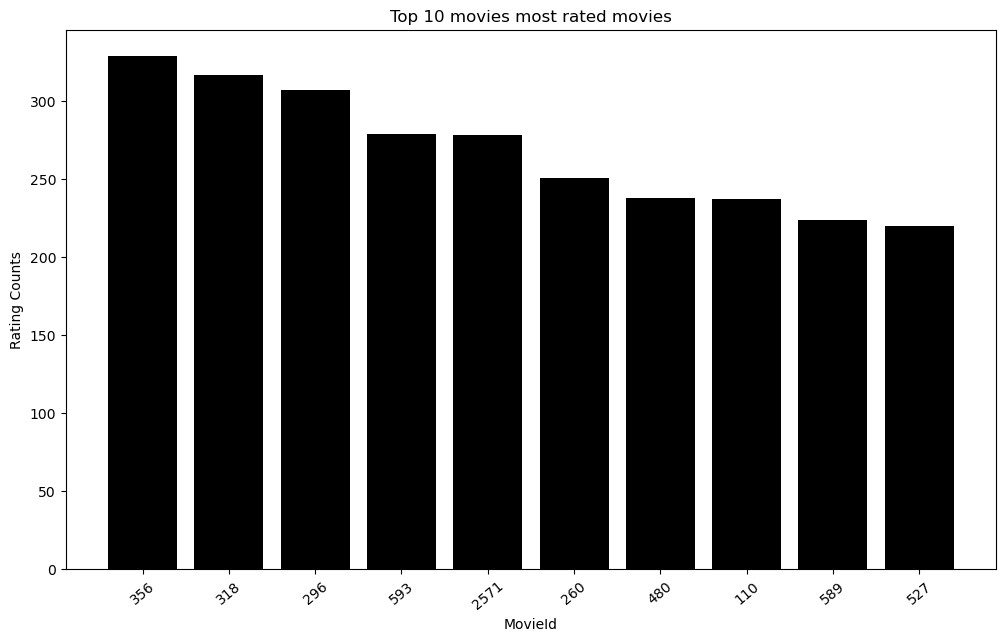

In [180]:
plt.figure(figsize=(12,7))
plt.bar(Top10['movieId'],Top10['count'],color="Black")
plt.title("Top 10 movies most rated movies")
plt.xlabel('MovieId')
plt.ylabel('Rating Counts')
plt.xticks(rotation=40)
plt.show()

#
### Create a line chart of average ratings over time.
#

In [249]:
df = ratings.groupby('year')['rating'].mean().reset_index()
df.head()

,year,rating
0,1996,3.535927
1,1997,3.727557
2,1998,3.435897
3,1999,3.772448
4,2000,3.392506


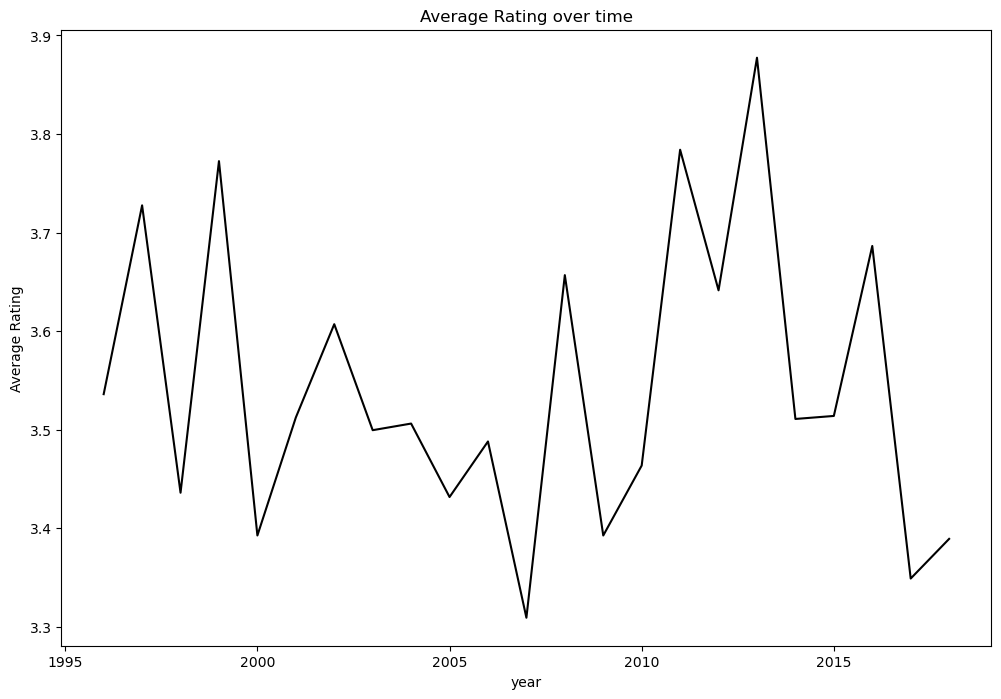

In [250]:
plt.figure(figsize=(12,8))
plt.plot(df['year'],df['rating'],color='Black')
plt.title('Average Rating over time')
plt.xlabel('year')
plt.ylabel('Average Rating')
plt.show()

#
### Generate a box plot for the distribution of ratings by user.
#

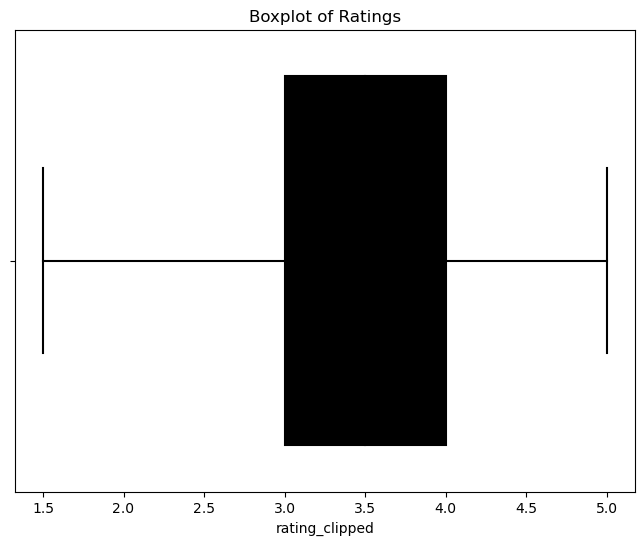

In [203]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=ratings['rating_clipped'],color='black')


plt.title('Boxplot of Ratings')
plt.show()

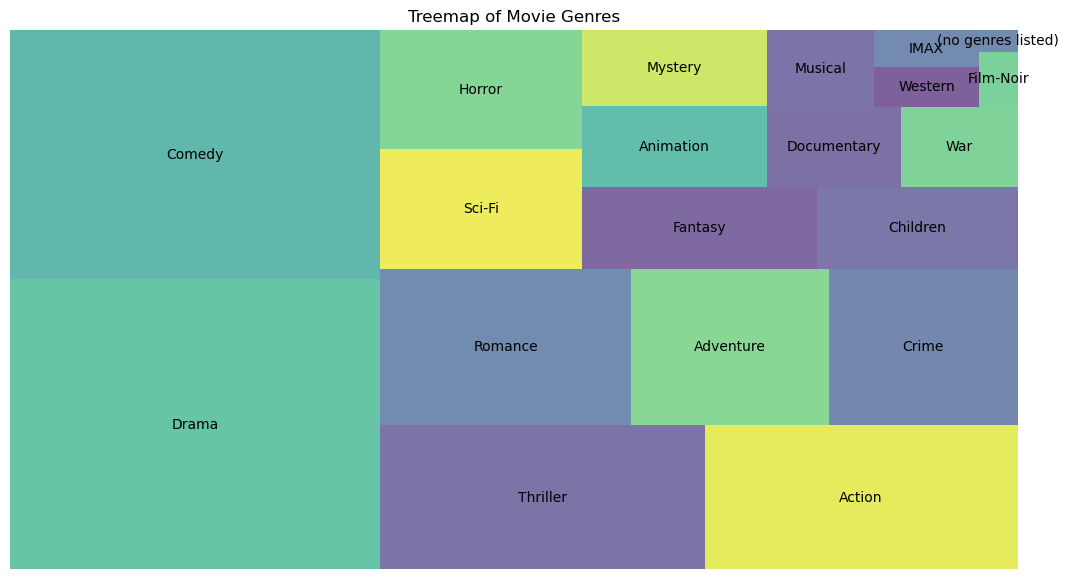

In [276]:
# Step 1: Calculate the count of movies for each genre
genre_count = movies['genres'].value_counts().reset_index()
genre_count.columns = ['genre', 'count']

# Step 2: Plot the treemap
plt.figure(figsize=(13, 7))
squarify.plot(sizes=genre_count['count'], label=genre_count['genre'], alpha=0.7)

# Customize the plot
plt.axis('off')
plt.title('Treemap of Movie Genres')
plt.show()

#
#
#   Descriptive Statistics
#
#

#
###  Calculate the mean rating of all movies.
#

In [406]:
df = ratings

In [407]:
df.groupby('movieId')['rating'].mean().round(2).reset_index()

,movieId,rating
0,1,3.92
1,2,3.43
2,3,3.26
3,4,2.36
4,5,3.07
...,...,...
9719,193581,4.00
9720,193583,3.50
9721,193585,3.50
9722,193587,3.50


#
### Determine the mode of ratings.
#

In [284]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

#
### Calculate the standard deviation of ratings.
#

In [288]:
ratings['rating'].std()

1.0425292390605359

#
### Find the variance of ratings.
#

In [290]:
ratings['rating'].var()

1.08686721429614

#
### Calculate the interquartile range (IQR) of ratings.
#

In [295]:
Q1 = ratings['rating'].quantile(0.25)
Q3 = ratings['rating'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


#
### Determine the skewness of the rating distribution.
#

In [296]:
ratings['rating'].skew()

-0.6371993892529214

#
### Calculate the kurtosis of the rating distribution.
#

In [297]:
ratings['rating'].kurt()

0.12331407123922622

#
### Calculate the mean rating per genre.
#

In [301]:
Merg=pd.merge(movies,ratings,on='movieId')

In [303]:
Merg.groupby('genres')['rating'].mean().round(3)

genres
(no genres listed)    3.489
Action                3.448
Adventure             3.509
Animation             3.630
Children              3.413
Comedy                3.385
Crime                 3.658
Documentary           3.798
Drama                 3.656
Fantasy               3.491
Film-Noir             3.920
Horror                3.258
IMAX                  3.618
Musical               3.564
Mystery               3.632
Romance               3.507
Sci-Fi                3.456
Thriller              3.494
War                   3.808
Western               3.584
Name: rating, dtype: float64

#
### Calculate the standard deviation of ratings per genre.
#

In [305]:
Merg.groupby('genres')['rating'].std().round(3)

genres
(no genres listed)    1.218
Action                1.051
Adventure             1.029
Animation             0.970
Children              1.056
Comedy                1.067
Crime                 0.995
Documentary           0.820
Drama                 0.979
Fantasy               1.039
Film-Noir             0.887
Horror                1.143
IMAX                  0.988
Musical               0.989
Mystery               1.006
Romance               1.023
Sci-Fi                1.071
Thriller              1.025
War                   0.979
Western               1.012
Name: rating, dtype: float64

#
### Find the mean number of ratings per movie.
#

In [334]:
Merg.groupby('movieId').size().mean().round(2)

28.23

#
### Calculate the mean number of tags per movie.
#

In [315]:
Tag_movies = pd.merge(movies,tags,on='movieId')

In [331]:
Tag_movies.groupby('movieId')['tag'].size().mean().round(2)

6.32

#
### Determine the correlation between the number of ratings and average rating.
#

In [338]:
ratings_count = ratings.groupby('movieId').size().reset_index(name='num_ratings')
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='avg_rating')
movie_ratings = pd.merge(ratings_count, average_ratings, on='movieId')
correlation = movie_ratings['num_ratings'].corr(movie_ratings['avg_rating'])
print(correlation.round(3))

0.127


#
#
# Time Series Analysis
#
#

#
### Analyze trends in the number of ratings over time.
#

In [345]:
TS = ratings.groupby('year')['rating'].value_counts().reset_index()

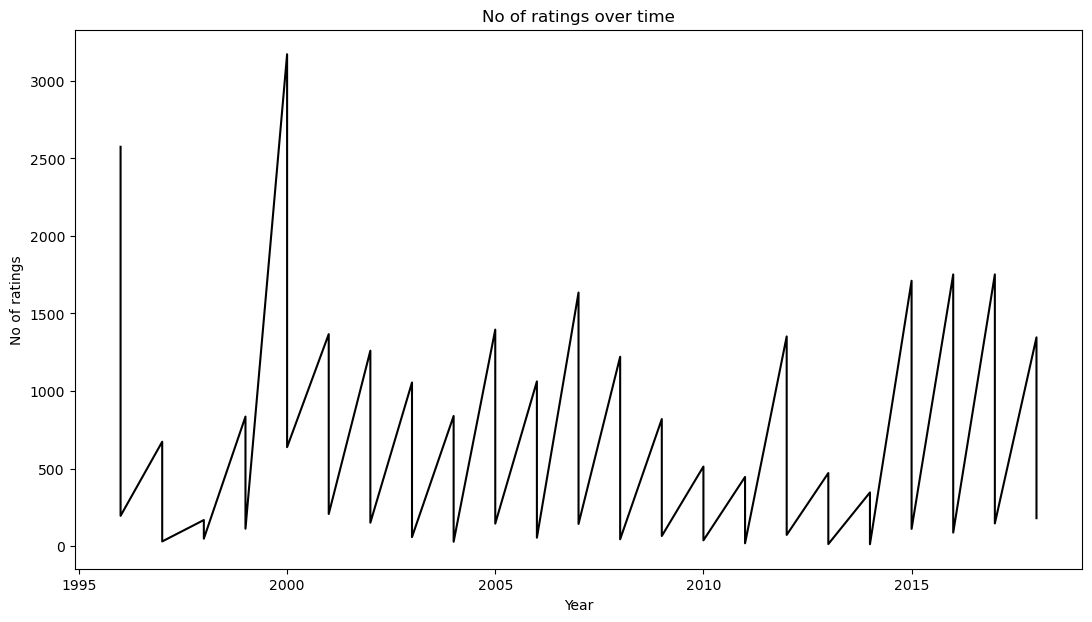

In [469]:
plt.figure(figsize=(13,7))
plt.plot(TS['year'],TS['count'],color='black')
plt.title('No of ratings over time')
plt.xlabel('Year')
plt.ylabel('No of ratings')
plt.show()

#
### Analyze trends in the number of tags over time.
#

In [498]:
TS2 = tags.groupby('year')['tag'].size()
TS2

year
2006    1533
2007      46
2008       9
2009     166
2010     133
2011      13
2012      47
2013      10
2014       7
2015     191
2016     355
2017     329
2018     844
Name: tag, dtype: int64

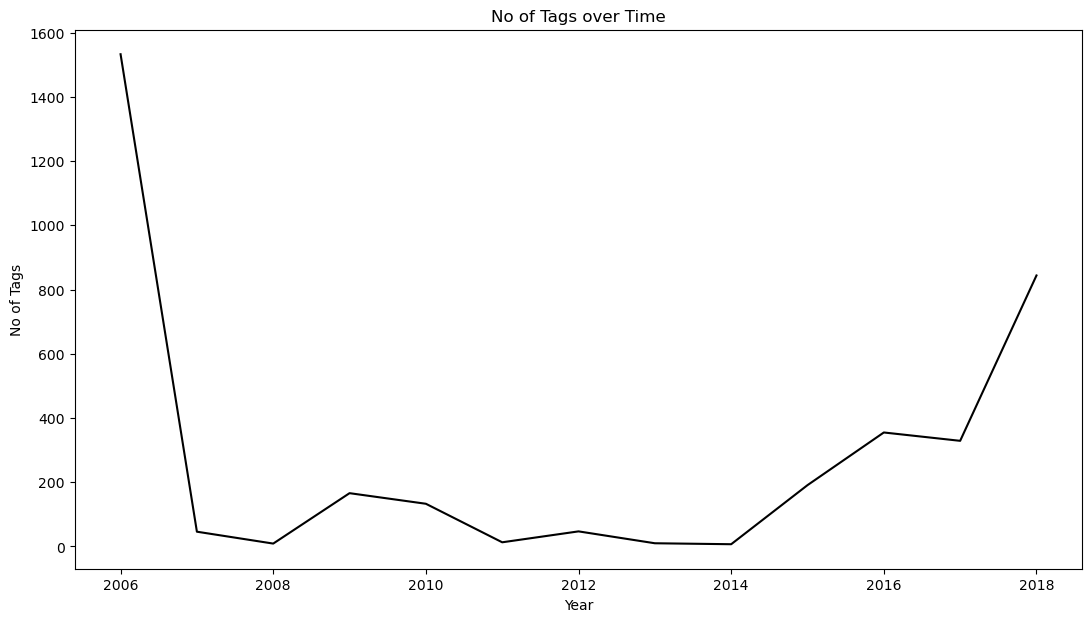

In [499]:
plt.figure(figsize=(13,7))
plt.plot(TS2.index,TS2,color='black')
plt.title('No of Tags over Time')
plt.xlabel('Year')
plt.ylabel('No of Tags')
plt.show()

#
###  Calculate moving averages of ratings over time.
#

In [403]:
ratings['MA'] = ratings['rating'].rolling(window=365).mean()

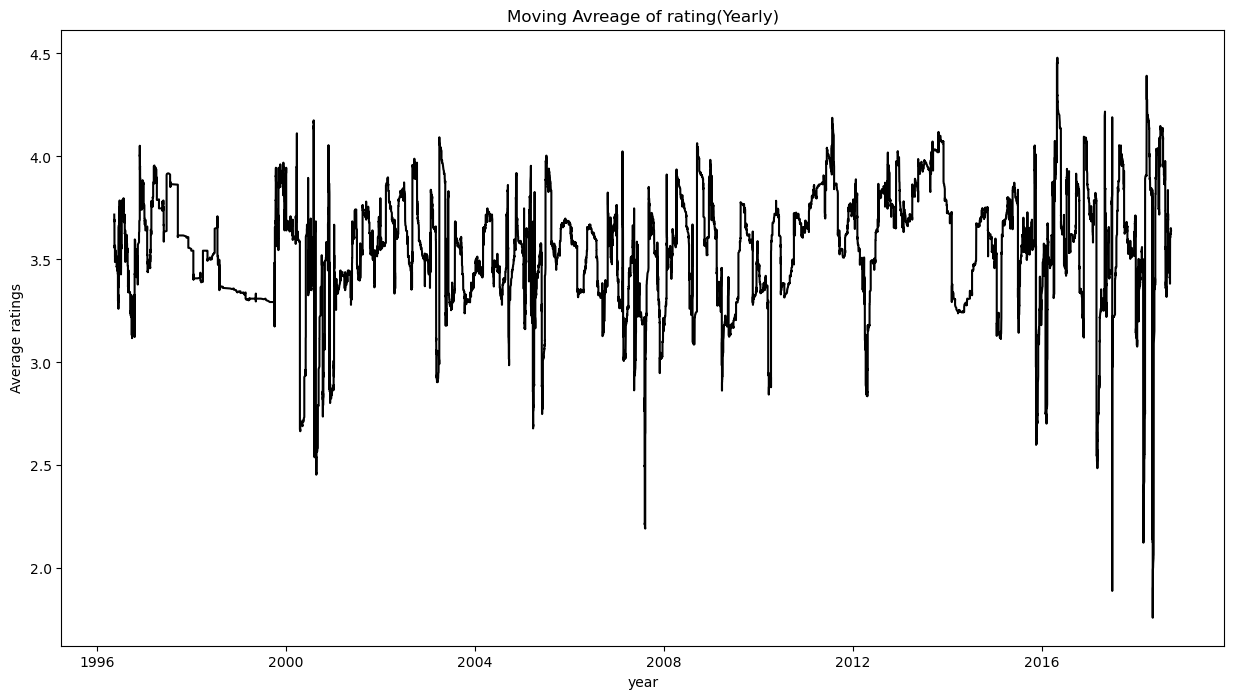

In [411]:
plt.figure(figsize=(15,8))
plt.plot(ratings['timestamp'], ratings['MA'], color='Black')
plt.title('Moving Avreage of rating(Yearly)')
plt.xlabel('year')
plt.ylabel('Average ratings')
plt.show()

#
### Analyze seasonal patterns in ratings.
#

In [422]:
ratings['months']=ratings['timestamp'].dt.month
SP = ratings.groupby('months')['rating'].mean().round(2).reset_index()
SP

,months,rating
0,1,3.50
1,2,3.35
2,3,3.46
3,4,3.61
4,5,3.45
5,6,3.42
6,7,3.64
7,8,3.36
8,9,3.60
9,10,3.51


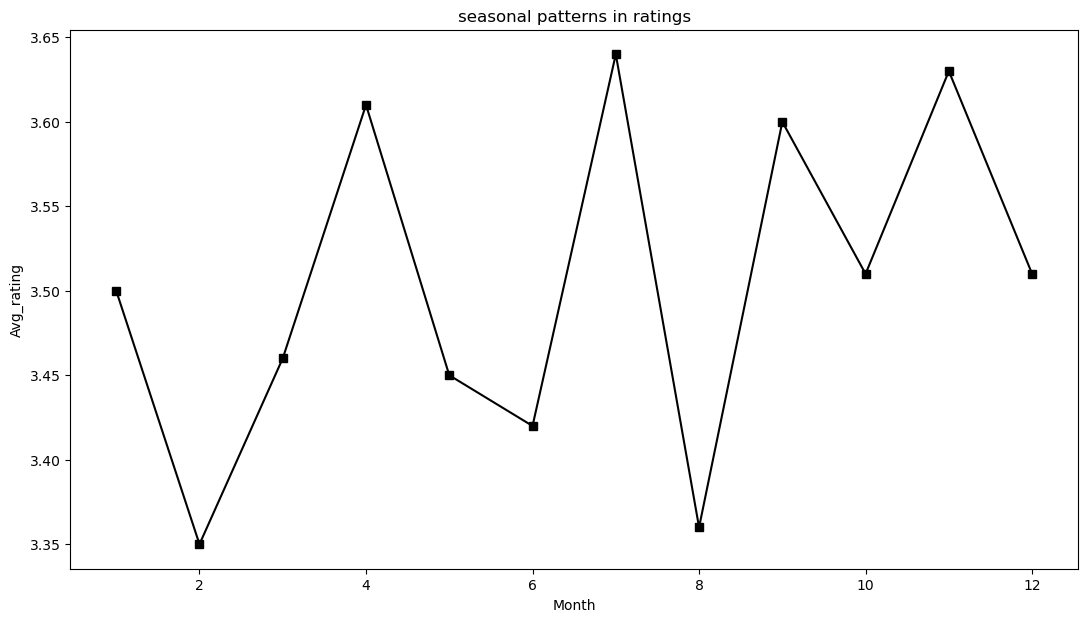

In [493]:
plt.figure(figsize=(13,7))
plt.plot(SP['months'],SP['rating'],color='black',marker='s')
plt.title('seasonal patterns in ratings')
plt.xlabel('Month')
plt.ylabel('Avg_rating')
plt.show()

#
### Analyze trends in ratings for a specific genre over time.
#

In [445]:
movies['genres'].value_counts().head(1) # we analyse the trend of Drama genre

genres
Drama    4361
Name: count, dtype: int64

In [456]:
drama_rating=ratings[ratings['movieId'].isin(movies[movies['genres']=='Drama']['movieId'])]

In [463]:
Drama_df = pd.merge(drama_rating,movies[movies['genres']=='Drama'],on='movieId')
Drama_vis=Drama_df.groupby('year')['rating'].mean().reset_index()

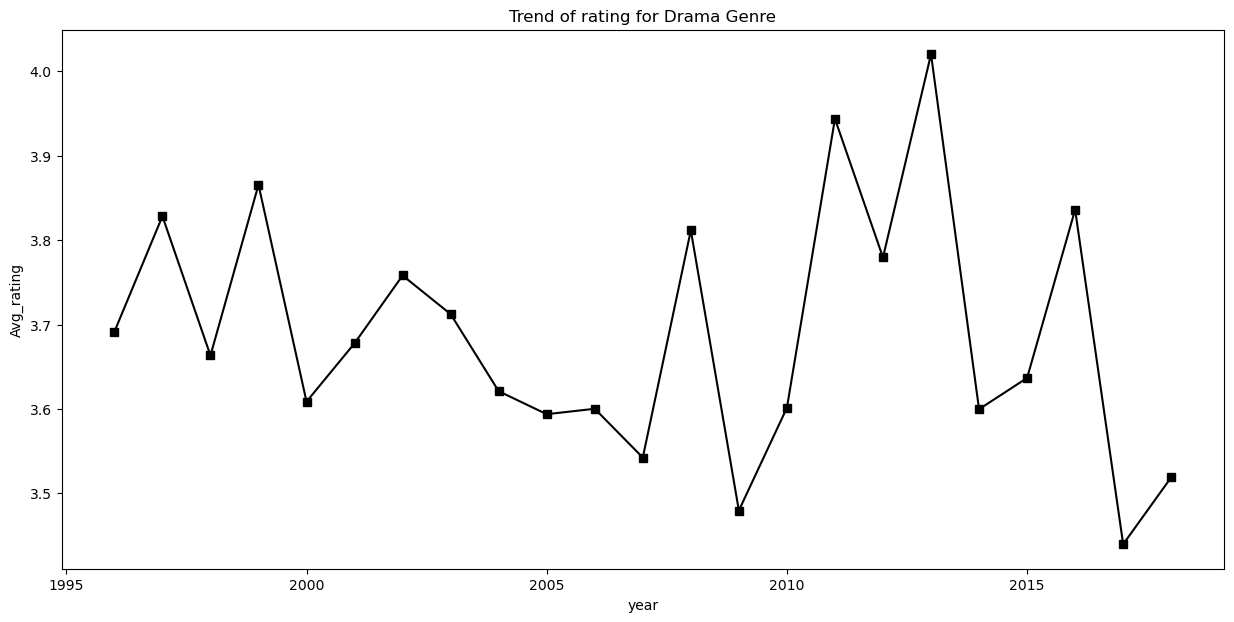

In [492]:
plt.figure(figsize=(15,7))
plt.plot(Drama_vis['year'],Drama_vis['rating'],color='black',marker='s')
plt.title('Trend of rating for Drama Genre')
plt.xlabel('year')
plt.ylabel('Avg_rating')
plt.show()

#
### Calculate and analyze rating frequency over time(Monthly).
#

In [488]:
df=ratings.copy()
RF = df.resample('M' , on='timestamp').size()

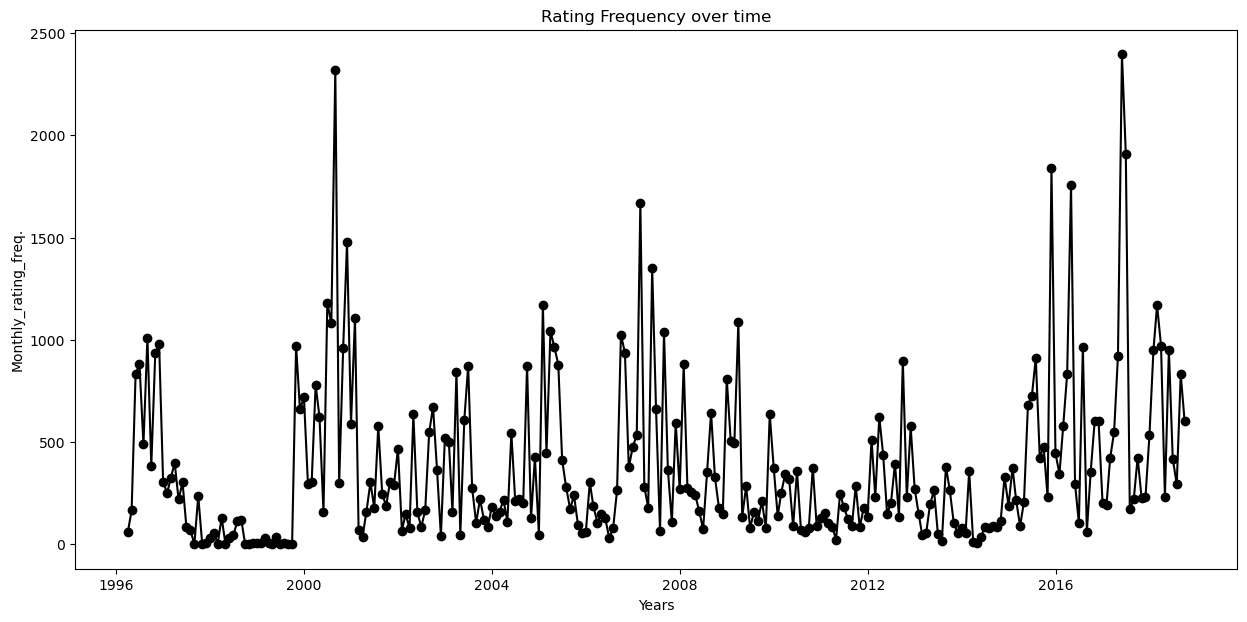

In [487]:
plt.figure(figsize=(15,7))
plt.plot(RF.index,RF,color='black',marker='o')
plt.title('Rating Frequency over time')
plt.xlabel('Years')
plt.ylabel('Monthly_rating_freq.')
plt.show()